# Web scraping. Exercise 2

In [1]:
# Import the libraries needed for scraping tasks
import requests
from bs4 import BeautifulSoup

### Fake the User-Agent

Some web pages that do business thanks to their content try to protect themselves from scraping.

There are many techniques to trick these pages and hide our intentions.

A basic technique is to fake the headers of our requests, to make server think that it is a browser 
and not a python script that is making the requests.

In [2]:
# Make a request to httpbin to check the "User-Agent" you send in the headers
url = 'https://httpbin.org/get'
pagina = requests.get(url)


In [3]:
# Modify the User-Agent in the headers and check, against httpbin.org, what is your new User-Agent
# Which User-Agent to use?
# You can search for any User-Agent on the internet.
# You can visit httpbin.org (get) with your browser and see the answer.
# You can find out information about your browser at https://www.whatismybrowser.com/


### Scraping in a Fake Jobs portal

In this exercise you will work against a fake work portal

https://realpython.github.io/fake-jobs/

In [4]:
# Investigate the portal's homepage
# Configure your scraper to simulate a web browser
# Download the web page

In [5]:
url = "https://realpython.github.io/fake-jobs/"
pagina = requests.get(url)

soup = BeautifulSoup(pagina.content, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Fake Python
  </title>
  <link href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css" rel="stylesheet"/>
 </head>
 <body>
  <section class="section">
   <div class="container mb-5">
    <h1 class="title is-1">
     Fake Python
    </h1>
    <p class="subtitle is-3">
     Fake Jobs for Your Web Scraping Journey
    </p>
   </div>
   <div class="container">
    <div class="columns is-multiline" id="ResultsContainer">
     <div class="column is-half">
      <div class="card">
       <div class="card-content">
        <div class="media">
         <div class="media-left">
          <figure class="image is-48x48">
           <img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
          </figure>
         </div>
         <div class="media-content">
          <h2 c

In [6]:
# Create a list of only the names/titles of the job offers
lista_names = soup.find_all(class_= "title is-5")

for i in lista_names:
    print(i.text)

Senior Python Developer
Energy engineer
Legal executive
Fitness centre manager
Product manager
Medical technical officer
Physiological scientist
Textile designer
Television floor manager
Waste management officer
Software Engineer (Python)
Interpreter
Architect
Meteorologist
Audiological scientist
English as a second language teacher
Surgeon
Equities trader
Newspaper journalist
Materials engineer
Python Programmer (Entry-Level)
Product/process development scientist
Scientist, research (maths)
Ecologist
Materials engineer
Historic buildings inspector/conservation officer
Data scientist
Psychiatrist
Structural engineer
Immigration officer
Python Programmer (Entry-Level)
Neurosurgeon
Broadcast engineer
Make
Nurse, adult
Air broker
Editor, film/video
Production assistant, radio
Engineer, communications
Sales executive
Software Developer (Python)
Futures trader
Tour manager
Cytogeneticist
Designer, multimedia
Trade union research officer
Chemist, analytical
Programmer, multimedia
Engineer, b

In [7]:
# Indicate the number of job offers
len(lista_names)

100

In [8]:
# Create a Dataframe with job offer data
# Title, company, location, date
import pandas as pd

job_offer = soup.find_all(class_= "card")
lista = []

for x in job_offer:
    texto = x.find(class_ = "title is-5").text
    company = x.find(class_ = "company").text
    location = x.find(class_ = "location").text.replace("\n", "").strip()
    time = x.find("time").text
    job = [texto, company,location,time]
    lista.append(job)
    
df = pd.DataFrame(lista)
df


,0,1,2,3
0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA",2021-04-08
1,Energy engineer,Vasquez-Davidson,"Christopherville, AA",2021-04-08
2,Legal executive,"Jackson, Chambers and Levy","Port Ericaburgh, AA",2021-04-08
3,Fitness centre manager,Savage-Bradley,"East Seanview, AP",2021-04-08
4,Product manager,Ramirez Inc,"North Jamieview, AP",2021-04-08
...,...,...,...,...
95,Museum/gallery exhibitions officer,"Nguyen, Yoder and Petty","Lake Abigail, AE",2021-04-08
96,"Radiographer, diagnostic",Holder LLC,"Jacobshire, AP",2021-04-08
97,Database administrator,Yates-Ferguson,"Port Susan, AE",2021-04-08
98,Furniture designer,Ortega-Lawrence,"North Tiffany, AA",2021-04-08


In [16]:
# Create a list of offers that include only the title and the link to more information about the offer.
job_offer = soup.find_all(class_= "card")

oferta = []

for x in job_offer:
    title =  x.find(class_ = "title is-5").text
    info = x.find_all("a")[0].get("href")
    job = [title, info]
    oferta.append(job)
oferta


[['Senior Python Developer',
  'https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html'],
 ['Energy engineer',
  'https://realpython.github.io/fake-jobs/jobs/energy-engineer-1.html'],
 ['Legal executive',
  'https://realpython.github.io/fake-jobs/jobs/legal-executive-2.html'],
 ['Fitness centre manager',
  'https://realpython.github.io/fake-jobs/jobs/fitness-centre-manager-3.html'],
 ['Product manager',
  'https://realpython.github.io/fake-jobs/jobs/product-manager-4.html'],
 ['Medical technical officer',
  'https://realpython.github.io/fake-jobs/jobs/medical-technical-officer-5.html'],
 ['Physiological scientist',
  'https://realpython.github.io/fake-jobs/jobs/physiological-scientist-6.html'],
 ['Textile designer',
  'https://realpython.github.io/fake-jobs/jobs/textile-designer-7.html'],
 ['Television floor manager',
  'https://realpython.github.io/fake-jobs/jobs/television-floor-manager-8.html'],
 ['Waste management officer',
  'https://realpython.github.io/fake-j

### Scraping a table of temperatures

In [29]:
# Build a DataFrame from the table of average temperatures of the city of A Coruña
# https://es.weatherspark.com/y/32597/Clima-promedio-en-La-Coru%C3%B1a-Espa%C3%B1a-durante-todo-el-a%C3%B1o
url = "https://es.weatherspark.com/y/32597/Clima-promedio-en-La-Coru%C3%B1a-Espa%C3%B1a-durante-todo-el-a%C3%B1o"

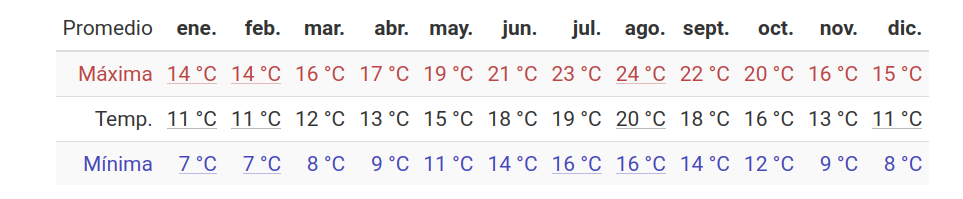

In [43]:
pagina = requests.get(url)
soup = BeautifulSoup(pagina.content,'html.parser')

tablas = soup.find(class_ = "MonthlyAveragesTable-outer_container")
tabla = tablas.find(class_ = "table table-striped table-condensed table-hover nowrap")
lista = []
temp_lista = []

for fila in tabla.find_all('tr'):
    for linha in fila.find_all(['td','th']):
        temp_lista.append(linha.text.replace("\n", ""))
    lista.append(temp_lista)
    temp_lista = []
lista

df = pd.DataFrame(lista)
df = df.rename(columns=df.iloc[0]).drop(0)


df

,Promedio,ene.,feb.,mar.,abr.,may.,jun.,jul.,ago.,sept.,oct.,nov.,dic.
1,Máxima,14 °C,14 °C,16 °C,17 °C,19 °C,21 °C,23 °C,24 °C,22 °C,20 °C,16 °C,15 °C
2,Temp.,11 °C,11 °C,12 °C,13 °C,15 °C,18 °C,19 °C,20 °C,18 °C,16 °C,13 °C,11 °C
3,Mínima,7 °C,7 °C,8 °C,9 °C,11 °C,14 °C,16 °C,16 °C,14 °C,12 °C,9 °C,8 °C


### Scraping of road bikes in milanuncios

In [11]:
# On occasions there are pages that do not make it easy for us to perform scraping with your data
# Try to obtain the data of the second hand bicycles of road of the province of A Coruña.

In [12]:
# Identifies the page to be scraped

In [13]:
# Try to get som data


In [14]:
# Identify the problems you encounter
